# Worksheet 14

Name: Themistoklis Nikas

UID: U91062110 

### Topics

- Naive Bayes
- Model Evaluation

### Naive Bayes

| Attribute A | Attribute B | Attribute C | Class |
|-------------|-------------|-------------|-------|
| Yes         | Single      | High        | No    |
| No          | Married     | Mid         | No    |
| No          | Single      | Low         | No    |
| Yes         | Married     | High        | No    |
| No          | Divorced    | Mid         | Yes   |
| No          | Married     | Low         | No    |
| Yes         | Divorced    | High        | No    |
| No          | Single      | Mid         | Yes   |
| No          | Married     | Low         | No    |
| No          | Single      | Mid         | Yes   |

a) Compute the following probabilities:

- P(Attribute A = Yes | Class = No)
- P(Attribute B = Divorced | Class = Yes)
- P(Attribute C = High | Class = No)
- P(Attribute C = Mid | Class = Yes)

* 3/7
* 1/3
* 3/7
* 3/3

b) Classify the following unseen records:

- (Yes, Married, Mid)
- (No, Divorced, High)
- (No, Single, High)
- (No, Divorced, Low)

need to compute P(yes, married, mid | C = yes) and P(yes, married, mid | C = no)
Under Naaive Bayes' assumption of independence, these probabilities have the following equivalences:
maximizing P(yes, married, mid | C = yes) is equivalent to maximizing  P(yes | C = yes) * P(married | C = yes) * P(mid | C = yes) = 0

same for class no

maximizing P(yes, married, mid | C = no) is equivalent to maximizing  P(yes | C = no) * P(married | C = no) * P(mid | C = no) = 3/7 * 4/7 * 1/7 so we predict claass = no

* NO
* P(No, Divorved, High|yes) = 1 * 1/3 * 0 = 0 and P(No, Divorved, High|no) = 4/7 * 1/7 * 3/7 which is greater that the previous likelihood so we predict NO
* P(No, Single, High|yes) = 1 * 2/3 * 0 = 0 and P(No, Single, High|no) = 4/7 * 2/7 * 3/7 which is greater than the previous likelihood so we predict NO
* P(No, Divorced, Low|yes) = 1 * 1/3 * 0 = 0 and P(No, Divorced, Low|no) = 4/7 * 1/7 * 3/7 which is greater than the previous likelihood so we predict NO

### Model Evaluation

a) Write a function to generate the confusion matrix for a list of actual classes and a list of predicted classes

In [1]:
actual_class = ["Yes", "No", "No", "Yes", "No", "No", "Yes", "No", "No", "No"]
predicted_class = ["Yes", "No", "Yes", "No", "No", "No", "Yes", "Yes", "Yes", "No"]

def confusion_matrix(actual, predicted):
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    for i in range(len(actual)):
        if actual[i] == "Yes" and predicted[i] == "Yes":
            TP += 1
        elif actual[i] == "No" and predicted[i] == "Yes":
            FP += 1
        elif actual[i] == "No" and predicted[i] == "No":
            TN += 1
        elif actual[i] == "Yes" and predicted[i] == "No":
            FN += 1
    return [[TP, FN], [FP, TN]]

print(confusion_matrix(actual_class, predicted_class))

[[2, 1], [3, 4]]


b) Assume you have the following Cost Matrix:

|            | predicted = Y | predicted = N |
|------------|---------------|---------------|
| actual = Y |       -1      |       5       |
| actual = N |        10     |       0       |

What is the cost of the above classification?

-1*(2) + 5*(1) + 10*(3) + 4*(0) = 33

c) Write a function that takes in the actual values, the predictions, and a cost matrix and outputs a cost. Test it on the above example.

In [2]:
def cost(actual, predicted, cost_matrix):
    conf_matrix = confusion_matrix(actual, predicted)
    total_cost = 0
    for i in range(len(conf_matrix)):
        for j in range(len(conf_matrix[i])):
            total_cost += conf_matrix[i][j] * cost_matrix[i][j]
    return total_cost
cost(actual_class, predicted_class, [[-1, 5], [10, 0]])

33

d) Implement functions for the following:

- accuracy
- precision
- recall
- f-measure

and apply them to the above example.

In [3]:
def accuracy(actual, predicted):
    conf_matrix = confusion_matrix(actual, predicted)
    TP = conf_matrix[0][0]
    FP = conf_matrix[1][0]
    TN = conf_matrix[1][1]
    FN = conf_matrix[0][1]
    return (TP + TN) / (TP + FP + TN + FN)
print(accuracy(actual_class, predicted_class))

def precision(actual, predicted):
    conf_matrix = confusion_matrix(actual, predicted)
    TP = conf_matrix[0][0]
    FP = conf_matrix[1][0]
    return TP / (TP + FP)
print(precision(actual_class, predicted_class))

def recall(actual, predicted):
    conf_matrix = confusion_matrix(actual, predicted)
    TP = conf_matrix[0][0]
    FN = conf_matrix[0][1]
    return TP / (TP + FN)
print(recall(actual_class, predicted_class))

def f1_score(actual, predicted):
    precision_score = precision(actual, predicted)
    recall_score = recall(actual, predicted)
    return 2 * (precision_score * recall_score) / (precision_score + recall_score)
print(f1_score(actual_class, predicted_class))

0.6
0.4
0.6666666666666666
0.5


## Challenge (Midterm prep part 2)

In this exercise you will update your submission to the titanic competition.

a) First let's add new numerical features / columns to the datasets that might be related to the survival of individuals.

- `has_cabin` should have a value of 0 if the `cabin` feature is `nan` and 1 otherwise
- `family_members` should have the total number of family members (by combining `SibSp` and `Parch`)
- `title_type`: from the title extracted from the name, we will categorize it into 2 types: `common` for titles that many passengers have, `rare` for titles that few passengers have. Map `common` to 1 and `rare` to 0. Describe what threshold you used to define `common` and `rare` titles and how you found it.
- `fare_type`: using Kmeans clustering on the fare column, find an appropriate number of clusters / groups of similar fares. Using the clusters you created, `fare_price` should be an ordinal variable that represents the expensiveness of the fare. For example if you split fare into 3 clusters ( 0 - 15, 15 - 40, and 40+ ) then the `fare_price` value should be `0` for `fare` values 0 - 15, `1` for 15 - 40, and `2` for 40+.
- Create an addition two numerical features of your invention that you think could be relevant to the survival of individuals.

Note: The features must be numerical because the sklearn `DecisionTreeClassifier` can only take on numerical features.

In [4]:
import pandas as pd
train_data = pd.read_csv("titanic/train.csv")
test_data = pd.read_csv("titanic/test.csv")

# add 'has_cabin' column. 1 if cabin is not NaN, 0 otherwise
train_data['has_cabin'] = train_data['Cabin'].notnull().astype(int)
test_data['has_cabin'] = test_data['Cabin'].notnull().astype(int)

# add 'family_members' column. SibSp + Parch
train_data['family_members'] = train_data['SibSp'] + train_data['Parch']
test_data['family_members'] = test_data['SibSp'] + test_data['Parch']


/Users/themistoklis/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/themistoklis/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [5]:
titles = {}
for name in train_data['Name']:
    title = name.split(',')[1].split('.')[0].strip()
    if title in titles:
        titles[title] += 1
    else:
        titles[title] = 1
# print sorted titles
titles = dict(sorted(titles.items(), key=lambda item: item[1], reverse=True))
print(titles)

{'Mr': 517, 'Miss': 182, 'Mrs': 125, 'Master': 40, 'Dr': 7, 'Rev': 6, 'Major': 2, 'Mlle': 2, 'Col': 2, 'Don': 1, 'Mme': 1, 'Ms': 1, 'Lady': 1, 'Sir': 1, 'Capt': 1, 'the Countess': 1, 'Jonkheer': 1}


From the above frequencies, we will define as rare anything lower than 40.

In [6]:
# add 'title_type' column. 1 if title is common , 0 otherwise
common_titles = [title for title in titles if titles[title] >= 40]
train_data['title_type'] = train_data['Name'].apply(lambda x: 1 if x.split(',')[1].split('.')[0].strip() in common_titles else 0)
test_data['title_type'] = test_data['Name'].apply(lambda x: 1 if x.split(',')[1].split('.')[0].strip() in common_titles else 0)

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


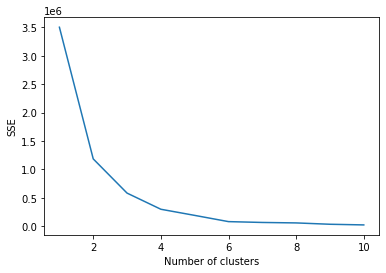

In [7]:
# kmeans on 'Fare' on both train and test data combined, plot to find optimal number of clusters
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
train_fare = np.array(train_data['Fare']).reshape(-1, 1)
# replace nan values with mean
train_fare = np.where(np.isnan(train_fare), np.nanmean(train_fare), train_fare)
test_fare = np.array(test_data['Fare']).reshape(-1, 1)
# replace nan values with mean
test_fare = np.where(np.isnan(test_fare), np.nanmean(test_fare), test_fare)
fare = np.concatenate((train_fare, test_fare))
sse = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(fare)
    sse.append(kmeans.inertia_)
plt.plot(range(1, 11), sse)
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [8]:
# use 4 clusters to create 'fare_type' column in train_data and test_data 0 for lowest fare, 3 for highest fare
kmeans = KMeans(n_clusters=4, random_state=0).fit(fare)
train_data['fare_type'] = kmeans.predict(train_fare)
test_data['fare_type'] = kmeans.predict(test_fare)

# one hot encode 'Embarked' column to 1 and 0
train_data = pd.get_dummies(train_data, columns=['Embarked'])
test_data = pd.get_dummies(test_data, columns=['Embarked'])

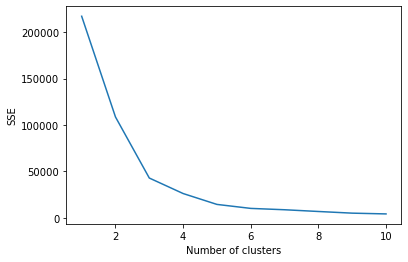

In [9]:
# kmeans on 'Age' on both train and test data combined, plot to find optimal number of clusters
train_age = np.array(train_data['Age']).reshape(-1, 1)
# replace nan values with mean
train_age = np.where(np.isnan(train_age), np.nanmean(train_age), train_age)
test_age = np.array(test_data['Age']).reshape(-1, 1)

test_age = np.where(np.isnan(test_age), np.nanmean(test_age), test_age)
age = np.concatenate((train_age, test_age))
sse = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(age)
    sse.append(kmeans.inertia_)
plt.plot(range(1, 11), sse)
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [10]:
# use 3 clusters to create 'age_group' column in train_data and test_data 0 for lowest age, 2 for highest age
kmeans = KMeans(n_clusters=3, random_state=0).fit(age)
train_data['age_group'] = kmeans.predict(train_age)
test_data['age_group'] = kmeans.predict(test_age)

b) Using a method covered in class, tune the parameters of a decision tree model on the titanic dataset (containing all numerical features including the ones you added above). Evaluate this model locally and report it's performance.

Note: make sure you are not tuning your parameters on the same dataset you are using to evaluate the model. Also explain how you know you are not overfitting to the training set.

In [11]:
# drop name, ticket, cabin columns
train_data = train_data.drop(columns=['Name', 'Ticket', 'Cabin'])
test_data = test_data.drop(columns=['Name', 'Ticket', 'Cabin'])
# convert male and female to 1 and 0
train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})
test_data['Sex'] = test_data['Sex'].map({'male': 0, 'female': 1})

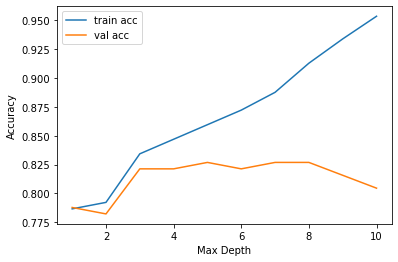

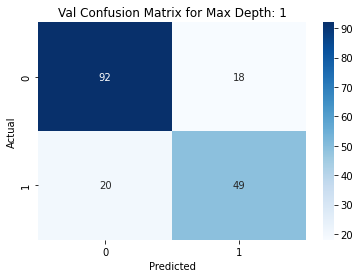

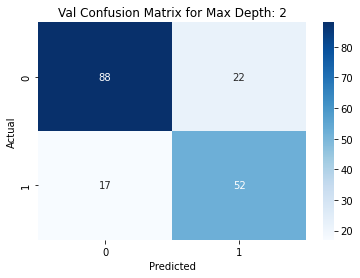

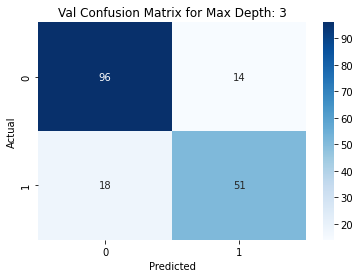

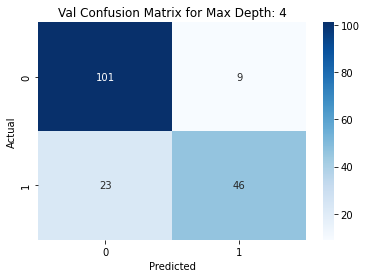

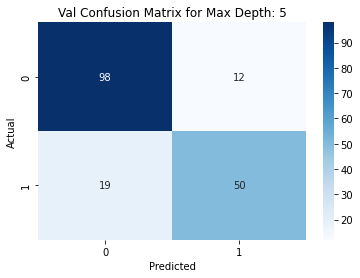

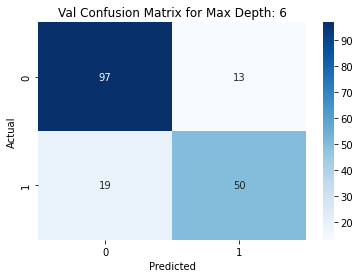

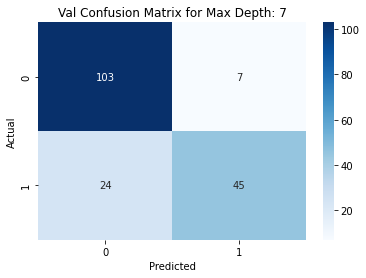

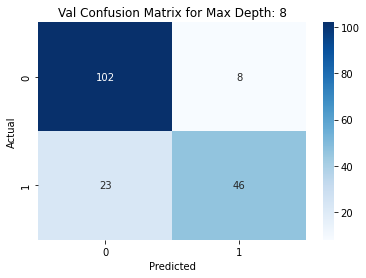

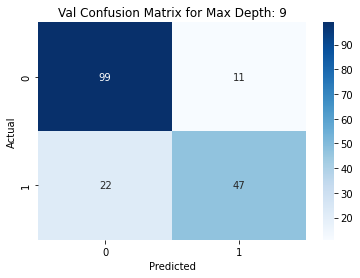

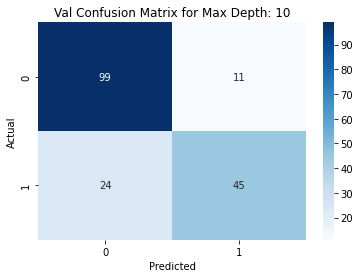

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
X = train_data.drop(columns=['Survived'])
y = train_data['Survived']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

depths = range(1, 11)
train_accuracy = []
val_accuracy = []
train_conf_matrix = []
val_conf_matrix = []
for depth in depths:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=0)
    dt.fit(X_train, y_train)
    train_accuracy.append(accuracy_score(y_train, dt.predict(X_train)))
    val_accuracy.append(accuracy_score(y_val, dt.predict(X_val)))
    train_conf_matrix.append(confusion_matrix(y_train, dt.predict(X_train)))
    val_conf_matrix.append(confusion_matrix(y_val, dt.predict(X_val)))
plt.plot(depths, train_accuracy, label='train acc')
plt.plot(depths, val_accuracy, label='val acc')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


for i in range(len(depths)):
    plt.figure()
    sns.heatmap(val_conf_matrix[i], annot=True, fmt='d', cmap='Blues')
    plt.title('Val Confusion Matrix for Max Depth: ' + str(depths[i]))
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

We will use a Decision Tree Classifier with depth 5, since from that point on the validation accuracy starts to decrease, while the training accuracy keeps increasing which is a sign of overfitting. We further evaluate this from the confusion matrices where, the highest values are in the diagonal of every matrix, i.e., TP and TN and we get the best such values for deapth = 5.

A more sophisticated method to find the optimal parameters for a model is GridSearchCV which tries all possible combinations of parameters and finds the best one. We will use GridSearchCV to find the best parameters for a Decision Tree Classifier

In [13]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth': range(1, 11), 'min_samples_leaf': range(1, 11), 'max_leaf_nodes': range(2, 11)}
# min_samples_leaf: specifies the minimum number of samples required to split an internal node
# max_leaf_nodes: specifies the maximum number of leaf nodes
clf = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(clf, parameters, cv=5)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.score(X_val, y_val))

{'max_depth': 4, 'max_leaf_nodes': 10, 'min_samples_leaf': 1}
0.8268156424581006


From the above grid search, we can see that the best decision tree has max depth of 4, max leaf nodes 10 and min samples leaf 1. The accuracy we get is really close to the one we report in the above plot, where we only used max depth as a parameter to identify the best model. 

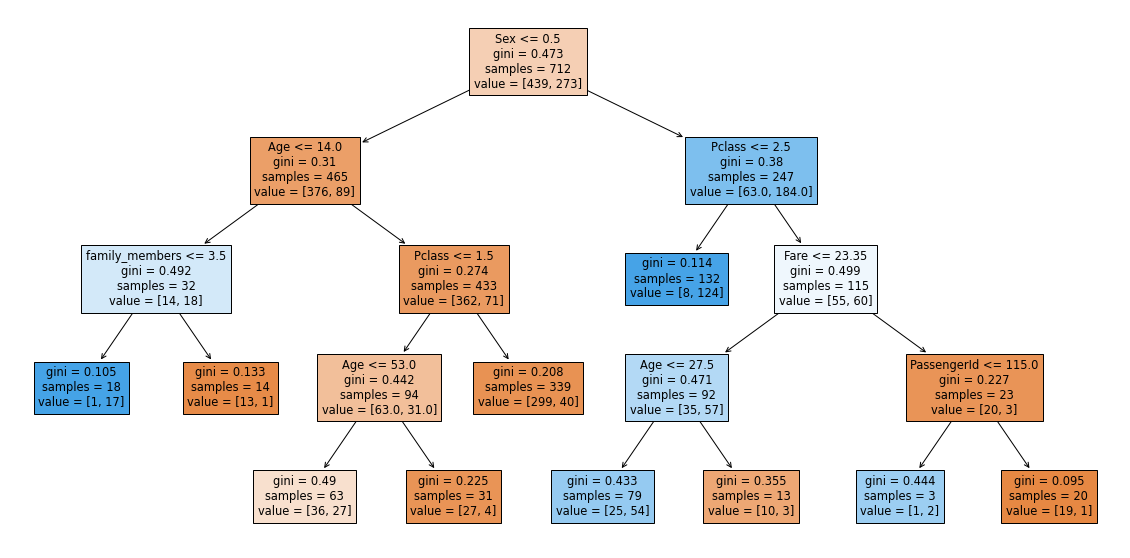

In [14]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
dt = DecisionTreeClassifier(max_depth=4, max_leaf_nodes=10, min_samples_leaf=1, random_state=42)
dt.fit(X_train, y_train)
plot_tree(dt, filled=True, feature_names=X.columns)
plt.show()

c) Try reducing the dimension of the dataset and create a Naive Bayes model. Evaluate this model.

In [15]:
# reduce the dimensions of the data using PCA and create a Naive Bayes classifier to evaluate the model
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

X_train['Age'] = np.where(np.isnan(X_train['Age']), np.nanmean(X_train['Age']), X_train['Age'])
X_val['Age'] = np.where(np.isnan(X_val['Age']), np.nanmean(X_val['Age']), X_val['Age'])
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)
gnb = GaussianNB()
gnb.fit(X_train_pca, y_train)
print(accuracy_score(y_val, gnb.predict(X_val_pca)))

0.7541899441340782


This greatly depends on the number of components that we are using to perform PCA.

d) Create an ensemble classifier using a combination of KNN, Decision Trees, and Naive Bayes models. Evaluate this classifier.

In [19]:
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
dt = DecisionTreeClassifier(max_depth=4, max_leaf_nodes=10, min_samples_leaf=1, random_state=42)
gnb = GaussianNB()
ensemble = VotingClassifier(estimators=[('knn', knn), ('dt', dt), ('gnb', gnb)], voting='hard')
ensemble.fit(X_train, y_train)
print(accuracy_score(y_val, ensemble.predict(X_val)))

0.7821229050279329


e) Update your kaggle submission using the best model you created (best model means the one that performed the best on your local evaluation)

In [17]:
# we will use the best model to predict the test data and create a submission. 
# We will use DecisionTreeClassifier with max_depth=4, max_leaf_nodes=10, min_samples_leaf=1, where we reported 0.82 accuracy 
dt = DecisionTreeClassifier(max_depth=4, max_leaf_nodes=10, min_samples_leaf=1, random_state=42)
dt.fit(X_train, y_train)
predictions = dt.predict(test_data)
submission = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': predictions})
submission.to_csv('submission.csv', index=False)

https://www.kaggle.com/competitions/titanic/submissions#

## Some useful code for the midterm

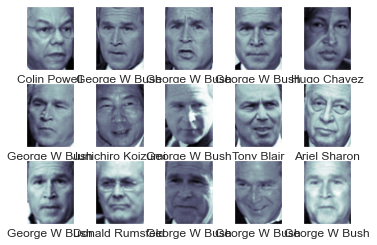

{'svc__C': 5, 'svc__gamma': 0.005}


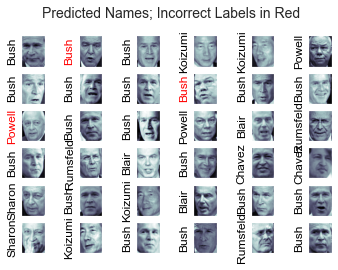

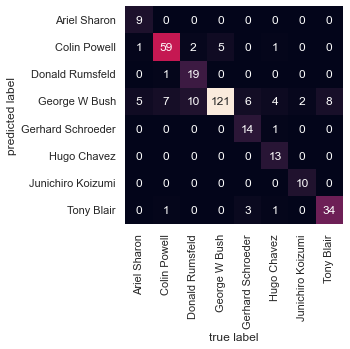

Accuracy =  0.827893175074184


In [18]:
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.datasets import fetch_lfw_people
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

sns.set()

# Get face data
faces = fetch_lfw_people(min_faces_per_person=60)

# plot face data
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])
plt.show()

# split train test set
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42)

pca = PCA(n_components=150, whiten=True)
svc = SVC(kernel='rbf', class_weight='balanced')
svcpca = make_pipeline(pca, svc)

# Tune model to find best values of C and gamma using cross validation
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
kfold = 10
grid = GridSearchCV(svcpca, param_grid, cv=kfold)
grid.fit(Xtrain, ytrain)

print(grid.best_params_)

# use the best params explicitly here
pca = PCA(n_components=150, whiten=True)
svc = SVC(kernel='rbf', class_weight='balanced', C=10, gamma=0.005)
svcpca = make_pipeline(pca, svc)

model = BaggingClassifier(svcpca, n_estimators=100).fit(Xtrain, ytrain)
yfit = model.predict(Xtest)

fig, ax = plt.subplots(6, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)
plt.show()

mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

print("Accuracy = ", accuracy_score(ytest, yfit))